# 2. Solving ordinary differential equations: Accuracy of the Euler and Runge-Kutta methods

**Pin number**: 

### Solution of ODE by means of Euler and Runge-Kutta methods

We start by assigning values to parameters $PIN$, $a$, $b$, $N$, $h$ and $C$ as well as defining functions $f(x,y)=-Cy-Cx^3-3x^2$ and $y(x)=10\exp(-Cx)-x^3$.

In [69]:
# Define here variables PIN, a, b, N, h, C and assign appropriate values to them

PIN = 132 # Provide here your PIN number
a = 0.0
b = 5.0
N = 8
h = (b-a)/N
C = 1.5-PIN/750.0
%whos


Variable           Type        Data/Info
----------------------------------------
C                  float       1.324
C_2                float       156.0
Euler              function    <function Euler at 0x1119bcc20>
Euler2             function    <function Euler2 at 0x111b15080>
Euler_N            list        n=8
N                  int         8
PIN                int         132
RK                 function    <function RK at 0x11191f880>
RK_N               list        n=8
a                  float       0.0
b                  float       5.0
coef_Euler         ndarray     2: 2 elems, type `float64`, 16 bytes
coef_RK            ndarray     2: 2 elems, type `float64`, 16 bytes
cols               list        n=6
data_N             list        n=8
error_Euler_N      list        n=21
error_RK_N         list        n=8
errors             list        n=8
euler              function    <function euler at 0x11191f6a0>
f                  function    <function f at 0x11191f9c0>
f2             

In [70]:
# Define here the function f(x,y)=-Cy-Cx^3-3x^2 as well as the exact solution y(x)=10*exp(-Cx)-x^3

import math

def f(x,y):
    f = -C*y-C*x**3-3*x**2
    return f

# Provide here the definition of the exact solution y(x)
def y(x):
    y=10 * math.exp(-C*x)-x**3
    return y




**Question 1**. Calculate numerical approximations $y_1,..., y_N$ by means of the Euler and Runge-Kutta methods and compare them to the values of the exact solution $y(x_1),..., y(x_N)$. For this question we use $N=8$ and $h=0.625$.

In [71]:
# Construct here the following lists for the case h=0.625 (corresponding to N=8): 
# - x_values, 
# - y_values
# - y_euler_values
# - y_RK_values

x_values = [a]
y_values = [y(a)]
y_euler_values = [y(a)]
y_RK_values = [y(a)]

# Calculate the components of these lists for i=1,...,N

def euler(f, xi, yi):
    return yi+h*f(xi, yi)

def runge_kutta(f, xi, yi):
    k1 = f(xi, yi)
    k2 = f(xi+h/2, yi+h*k1/2)
    k3 = f(xi+h/2, yi+h*k2/2)
    k4 = f(xi+h, yi+h*k3)
    return yi + 1/6*h*(k1+2*k2+2*k3+k4)

for i in range(1,N+1):
    x_values.append(a+i*h)
    y_values.append(y(a+i*h))
    y_euler_values.append(euler(f, x_values[i-1], y_euler_values[i-1]))
    y_RK_values.append(runge_kutta(f, x_values[i-1], y_RK_values[i-1]))



...
from tabulate import tabulate
tab=[]
for i in range(N+1):
    tab.append([i, x_values[i], y_values[i], y_euler_values[i], y_RK_values[i]])
# Create a table with five columns: i, x_i, y(x_i), y_i Euler, y_i RK
cols = ['i', 'x_i', 'y(x_i)', 'y_i Euler', 'y_i RK']
print(tabulate(tab, headers=cols))
...


  i    x_i        y(x_i)    y_i Euler       y_i RK
---  -----  ------------  -----------  -----------
  0  0        10            10           10
  1  0.625     4.12727       1.725        4.1507
  2  1.25     -0.0422044    -0.636886    -0.033073
  3  1.875    -5.75646      -4.65576     -5.76924
  4  2.5     -15.2598      -12.8496     -15.294
  5  3.125   -30.358       -26.865      -30.4114
  6  3.75    -52.6646      -48.1981     -52.7358
  7  4.375   -83.7097      -78.319      -83.7977
  8  5      -124.987      -118.694     -125.091


Ellipsis

**Question 2**. Create a figure showing the exact solution $y(x)$ and numerical approximations $y_1,..., y_N$ for the Euler and Runge-Kutta method. Include appropriate axis labels, plot title and legend.

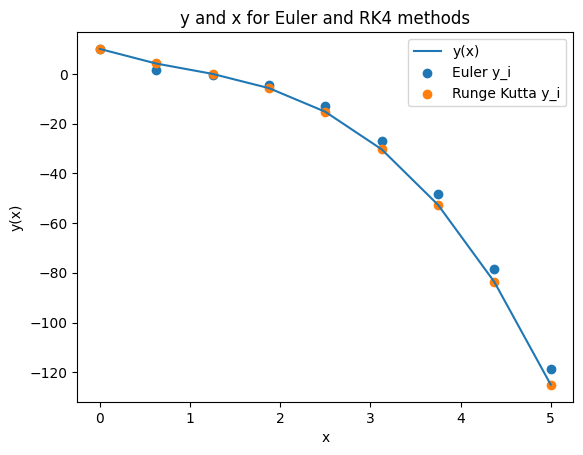

In [72]:
# Plot here the exact values y(x_i) as well as the numerically calculated values y_i for the Euler and Runge-Kutta method

import matplotlib.pyplot as plt

plt.plot(x_values, y_values, label='y(x)')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.scatter(x_values, y_euler_values, label='Euler y_i')
plt.scatter(x_values, y_RK_values, label='Runge Kutta y_i')
plt.title('y and x for Euler and RK4 methods')
plt.legend()
plt.show()

### Magnitude of the error at 𝑥=0.5 for values of ℎ corresponding to $N=8,16,...,1024$

We first change the range of $x$ values by evaluating the following cell:

In [73]:
a=0.0
b=0.5

**Question 3**. Write the functions Euler(N) and RK(N) that return the values of $y_N$ for different values of $N$.

In [74]:
# Define here the functions Euler(N) and RK(N) that return the numerical approximation y_N for varying parameters N

def Euler(N):
    h=(b-a)/N
    xi=a
    yi=y(a)
    for i in range(N):
        yi+=h*f(xi, yi)
        xi+=h
    return yi

def RK(N):
    h=(b-a)/N
    xi=a
    yi=y(a)
    for i in range(N):
        k1 = f(xi, yi)
        k2 = f(xi+h/2, yi+h*k1/2)
        k3 = f(xi+h/2, yi+h*k2/2)
        k4 = f(xi+h, yi+h*k3)
        yi += 1/6*h*(k1+2*k2+2*k3+k4)
        xi+=h
    return yi 
   


**Question 4**. Calculate the absolute values of the error $|y_N-y(x_N)|$ for $N=8,16,...,1024$ at $x_N=b=0.5$ for both Euler and
Runge-Kutta methods. Also calculate the natural logarithm of the absolute error, i.e., $\ln|y_N-y(x_N)|$. Tabulate your results in a table with six columns: $N$, $y(b)$, $y_N$ Euler, $|y_N-y(x_N)|$ Euler, $y_N$ Runge-Kutta, $|y_N-y(x_N)|$ Runge-Kutta.

In [75]:
# Calculate here the absolute values of the error |y_N-y(x_N)| and their natural logarithm for Euler and Runge-Kutta methods.
# Tabulate your results in six columns: "N","y(b)","y_N Euler","error Euler","y_N RK","error RK"


data_N = [8, 16, 32, 64, 128, 256, 512, 1024]
ln_data_N = [math.log(ele) for ele in data_N]

Euler_N = [Euler(i) for i in data_N]
error_Euler_N = [abs(y(b)-ele) for ele in Euler_N]
ln_error_Euler_N = [math.log(ele) for ele in error_Euler_N]

RK_N = [RK(i) for i in data_N]
error_RK_N = [abs(y(b)-ele) for ele in RK_N]
ln_error_RK_N = [math.log(ele) for ele in error_RK_N]

errors=[]
for i in range(N):
    errors.append([data_N[i], y(b), Euler_N[i], error_Euler_N[i], RK_N[i], error_RK_N[i]])

cols=["N","y(b)","y_N Euler","error Euler","y_N RK","error RK"]
print(tabulate(errors, headers=cols))


   N     y(b)    y_N Euler    error Euler    y_N RK     error RK
----  -------  -----------  -------------  --------  -----------
   8  5.03319      4.90465    0.128533      5.03319  1.00129e-06
  16  5.03319      4.97053    0.0626574     5.03319  5.95356e-08
  32  5.03319      5.00224    0.0309424     5.03319  3.62894e-09
  64  5.03319      5.01781    0.0153765     5.03319  2.2398e-10
 128  5.03319      5.02552    0.00766481    5.03319  1.39142e-11
 256  5.03319      5.02936    0.00382657    5.03319  8.70415e-13
 512  5.03319      5.03127    0.00191183    5.03319  5.86198e-14
1024  5.03319      5.03223    0.000955553   5.03319  7.99361e-15


**Question 5**. Determine linear fits of $\ln|y_N-y(x_N)|$ against $\ln(N)$ for $N=8,16,...,1024$ for both Euler and
Runge-Kutta methods. 

In [76]:
# Use this cell to determine a linear fit of ln(|y_N-y(x_N)|) against ln(N) for the Euler and Runge-Kutta method
import numpy as np

coef_Euler = np.polyfit(ln_data_N,ln_error_Euler_N,1)
fit_Euler = np.poly1d(coef_Euler)
print(coef_Euler)

coef_RK = np.polyfit(ln_data_N,ln_error_RK_N,1)
fit_RK = np.poly1d(coef_RK)
print(coef_RK)

[-1.00862137  0.02904991]
[-3.90663816 -5.87386888]


**Question 6**. Create a figure showing $\ln|y_N-y(x_N)|$ against $\ln(N)$ for $N=8,16,...,1024$ for both Euler and
Runge-Kutta methods as well as the linear fits to the data.

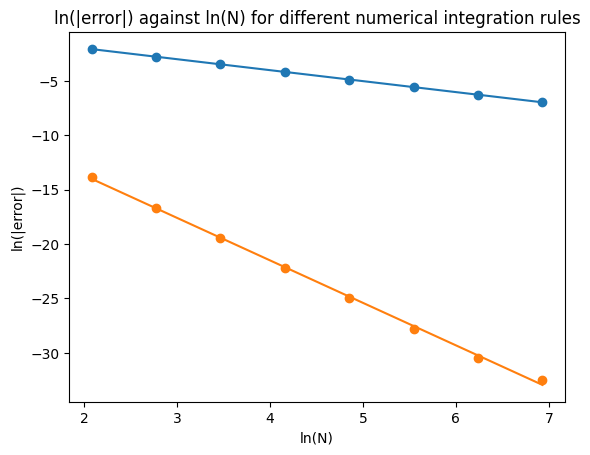

In [77]:
# Create here a figure showing ln(|y_N-y(x_N)|) against ln(N) for the Euler and Runge-Kutta method
plt.title('ln(|error|) against ln(N) for different numerical integration rules')
plt.ylabel('ln(|error|)')
plt.xlabel('ln(N)') 
plt.scatter(ln_data_N, ln_error_Euler_N)
plt.plot(ln_data_N,fit_Euler(ln_data_N),label=f'Euler Method: {coef_Euler[0]:.2f}x+{coef_Euler[1]:.2f}')


plt.scatter(ln_data_N, ln_error_RK_N)
plt.plot(ln_data_N,fit_RK(ln_data_N),label=f'RK Method: {coef_RK[0]:.2f}x+{coef_RK[1]:.2f}')

plt.show()


Brief comments on the slopes of linear fits:   h proportional to 1/N. from slope, error proportional to N**(-1)for Euler method and to N**(-4) for Runge-Kutta method. Then order of accuracy of Euler method is 1 and that of RK is 4.

### Stability of the Euler method

In order to investigate the stability of the Euler method for different values of $N$, we first need to assign new values to variables $a$, $b$ and $C_2$ as well as define new functions $f_2(x,y)=-C_2y$ and $y_2(x)=\exp(-C_2x)$.

In [93]:
# Assign here new values to variables a, b, and C_2
a=0.0
b=0.5
C_2 = 200-132/3


In [94]:
# Use this cell to define the function f2(x,y)=-C_2y and the exact solution y2(x)=exp(-C_2x)

def f2(x,y):
    return -C_2 * y

def y2(x):
    return math.exp(-C_2 * x)



**Question 7**.  Define a new function Euler2(N) that returns the approximate value $y_N$ calculated by means of the Euler method at $x=b=0.5$ for varying $N$. Consider the range $20\leq N \leq 40$ and calculate the absolute value of errors $|y_N - y_2(b)|$ for these values of $N$.

In [107]:
# Use this cell to define the function Euler2(N) and to calculate the absolute errors |y_N-y2(b)| for N=20,21,...40
def Euler2(N):
    h=(b-a)/N
    xi=a
    yi=y2(a)
    
    for i in range(N):
        yi+=h*f2(xi, yi)
        xi+=h
        if N==20:
            print(xi, yi)
       
    
    return yi

error_Euler_N=[]
for i in range(20,41):
    
    error_Euler_N.append(abs(y2(b)-Euler2(i)))
    if N==20:
        print(xi, yi)
print(error_Euler_N)

0.025 -2.9000000000000004
0.05 8.410000000000002
0.07500000000000001 -24.389000000000003
0.1 70.72810000000001
0.125 -205.11149000000003
0.15 594.8233210000001
0.175 -1724.9876309000003
0.19999999999999998 5002.464129610002
0.22499999999999998 -14507.145975869007
0.24999999999999997 42070.72333002012
0.27499999999999997 -122005.09765705836
0.3 353814.78320546926
0.325 -1026062.8712958609
0.35000000000000003 2975582.326757997
0.37500000000000006 -8629188.747598192
0.4000000000000001 25024647.36803475
0.4250000000000001 -72571477.36730078
0.4500000000000001 210457284.3651723
0.47500000000000014 -610326124.6589997
0.5000000000000001 1769945761.511099
[1769945761.511099, 1278694448.6028395, 844962852.0552833, 511212694.76104367, 283387333.42846626, 144011284.21842387, 67108864.0, 28679602.146463666, 11239195.971453324, 4037796.0770456768, 1329227.9957849162, 400701.6097545957, 110522.65461424031, 27864.608054309403, 6413.687876815957, 1345.904958177591, 257.0895515421969, 44.62095984090204

**Question 8**. Create a figure showing a scatter plot of the absolute values of errors $|y_N - y_2(b)|$ for $20\leq N \leq 40$. Label the axes of your figure appropriately and provide a suitable plot title.

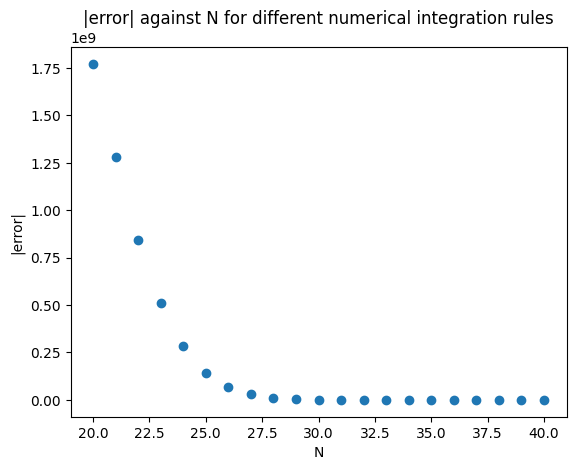

In [108]:
# Use this cell to create a scatter plot of |y_N-y2(b)| against N.
coef_Euler = np.polyfit(list(range(20, 41)),error_Euler_N,1)



plt.title('|error| against N for different numerical integration rules')
plt.ylabel('|error|')
plt.xlabel('N') 
plt.scatter(list(range(20, 41)), error_Euler_N)




It can be seen from the graph that the onset of stability occurs approximately for the following value of $N$: 40

This value of $N$ *can* be expected because ...  |1 - h* C_2|<1 implies   h < or = C_2/2 so N > or = 39. My estimate for stability was N=40 based on fact that Y_N < 1 when stability occurs (y_n=y_0*a**(n-1), y_0 = 1, if a is less than one which it needs to be for stability, then y_n less than zero) which I could read off from printed values of y_n.